In [ ]:
#WithLines does not enhance the image

In [10]:
import matplotlib.pyplot as plt
import cv2
import math
from PIL import Image
from PIL import ImageEnhance
from spellchecker import SpellChecker
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [5]:
import os
for file in os.listdir("./uploads"):
    if file.endswith(".jpg"):
        image_input = os.path.join("/uploads", file)
print(image_input)
#image_input = "uploads/input.jpg" #best.jpg;check.jpg;qwerty.jpg;text.jpg
img_save = "uploads/filtered.jpg"

/uploads\test_img.png


In [17]:
img = cv2.imread(image_input, -1)
size_tup = img.shape

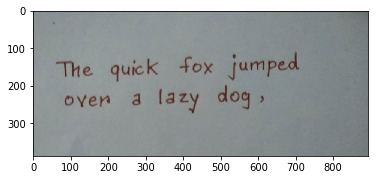

In [18]:
plt.imshow(img)

In [155]:
sumbg = 0.0
sumbr = 0.0
sq_sum = 0.0
count = 0
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        sumbg = sumbg + img[i][j][0] - img[i][j][1]
        sumbr = sumbr + img[i][j][0] - img[i][j][2]
        count = count + 1
meanbg = (sumbg / (count))
meanbr = (sumbr / (count))
print(meanbg)
print(meanbr)

sumbg = 0.0
sumbr = 0.0
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        posg = img[i][j][0] - meanbg
        posr = img[i][j][0] - meanbr
        if(0 <= posg):
            sumbg = sumbg + posg
        else:
            sumbg = sumbg - posg
        if(0 <= posr):
            sumbr = sumbr + posr
        else:
            sumbr = sumbr - posr
standard_deviationg = math.sqrt(sumbg / count)
standard_deviationr = math.sqrt(sumbr / count)
print (standard_deviationg)
print (standard_deviationr)

-10.261939225460123
-14.293256326687116
11.380763135934295
11.556517064288197


In [156]:
#Filters which has r greater in r b g

In [157]:
for i in range(size_tup[0]):
    for j in range(size_tup[1]):
        if(not(((img[i][j][0] - standard_deviationg) > img[i][j][1]) or ((img[i][j][0] - standard_deviationg) > img[i][j][2]))):
            for k in range(size_tup[2]):
                img[i][j][k] = 255


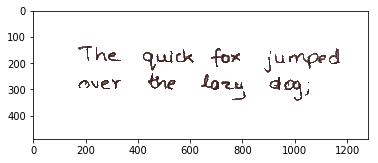

In [158]:
plt.imshow(img)

In [159]:
cv2.imwrite(img_save, img)
img = cv2.imread(img_save, -1)

True

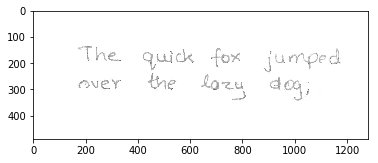

In [162]:
plt.imshow(img)

In [163]:
img = cv2.GaussianBlur(img,(5,5),0)

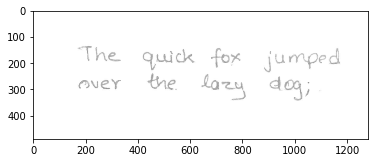

In [164]:
plt.imshow(img)

In [165]:
print(pytesseract.image_to_string(img))

The quid« fox jumped
oney the foe dog;


In [166]:
strout = pytesseract.image_to_string(img)

In [167]:
print(strout)

The quid« fox jumped
oney the foe dog;


In [168]:
#Proper nouns have to be written in Capitals.

spell = SpellChecker()
i = 0
list2 = (strout.split())
pnounmark = [0] * (len (list2))
#mark all the proper nouns with 1
for word in list2:
    if(word[0] <= 'Z' and word[0] >= 'A'):
        pnounmark[i] = 1
    i = i + 1
        
list1 = strout.split()
i = 0
#If the word is not a proper noun and the spelling is not correct then replace
for word in list1:
    if((pnounmark[i] != 1) and (spell[word] == 0)):
        if (list1[i][len(list1[i]) - 1] == '.'):
            list1[i] = spell.correction(word)
            list1[i] = list1[i] + '.'
            i = i + 1
            continue
        if (list1[i][len(list1[i]) - 1] == ','):
            list1[i] = spell.correction(word)
            list1[i] = list1[i] + ','
            i = i + 1
            continue
        list1[i] = spell.correction(word)
    i = i + 1
strcorr = ' '.join(map(str, list1))
print(strcorr)

The quid fox jumped one the foe dog


In [169]:
file = open('ans/ans.txt','w') 
file.write(strcorr)  
file.close()